In [416]:
import pandas as pd
import numpy as np
import re as re
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import svm
import sys
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.preprocessing import scale 
import seaborn as sns
import pandas as pd # for data manipulation
import numpy as np # for data manipulation

from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn import tree # for decision tree models

import plotly.express as px  # for data visualization
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import graphviz

print(sys.path)
import xlsxwriter

['C:\\Users\\16286\\Desktop\\MSBA\\Winter Quarter\\ML and DDR final project', 'C:\\Python310\\python310.zip', 'C:\\Python310\\DLLs', 'C:\\Python310\\lib', 'C:\\Python310', '', 'C:\\Users\\16286\\AppData\\Roaming\\Python\\Python310\\site-packages', 'C:\\Python310\\lib\\site-packages', 'C:\\Python310\\lib\\site-packages\\win32', 'C:\\Python310\\lib\\site-packages\\win32\\lib', 'C:\\Python310\\lib\\site-packages\\Pythonwin']


### Data Load ################

In [417]:
SD_AirbnbData = pd.read_csv('SanDiego_2019.csv')
#print(NY_AirbnbData)

print(SD_AirbnbData.describe())

                 id  thumbnail_url       host_id  host_acceptance_rate  \
count  1.305100e+04            0.0  1.305100e+04                   0.0   
mean   2.136327e+07            NaN  7.345408e+07                   NaN   
std    1.051321e+07            NaN  7.346784e+07                   NaN   
min    6.000000e+00            NaN  2.900000e+01                   NaN   
25%    1.358009e+07            NaN  1.326261e+07                   NaN   
50%    2.179748e+07            NaN  4.524850e+07                   NaN   
75%    3.069061e+07            NaN  1.159494e+08                   NaN   
max    3.786276e+07            NaN  2.867425e+08                   NaN   

       host_listings_count  host_total_listings_count      latitude  \
count         13046.000000               13046.000000  13051.000000   
mean             42.875824                  42.875824     32.768309   
std             175.380693                 175.380693      0.065377   
min               0.000000                   0.00

In [418]:
#print(data.head(5))
print(SD_AirbnbData.info())
print(SD_AirbnbData.shape[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13051 entries, 0 to 13050
Data columns (total 75 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                13051 non-null  int64  
 1   listing_url                       13051 non-null  object 
 2   name                              13051 non-null  object 
 3   summary                           12635 non-null  object 
 4   space                             10080 non-null  object 
 5   description                       12836 non-null  object 
 6   neighborhood_overview             9138 non-null   object 
 7   notes                             7103 non-null   object 
 8   transit                           8261 non-null   object 
 9   access                            8224 non-null   object 
 10  interaction                       8666 non-null   object 
 11  house_rules                       9587 non-null   object 
 12  thum

In [419]:
print(SD_AirbnbData.iloc[: , 35:40].head(10))

  smart_location country_code        country  latitude  longitude
0  San Diego, CA           US  United States  32.91736 -117.07635
1  San Diego, CA           US  United States  32.84067 -117.27443
2  San Diego, CA           US  United States  32.79797 -117.24250
3  San Diego, CA           US  United States  32.77545 -117.05923
4  San Diego, CA           US  United States  32.84619 -117.27558
5  San Diego, CA           US  United States  32.93033 -117.13254
6  San Diego, CA           US  United States  32.86547 -117.20862
7  San Diego, CA           US  United States  32.77369 -117.14638
8  San Diego, CA           US  United States  32.72218 -117.15788
9  San Diego, CA           US  United States  32.95787 -117.22101


### Preprocessing 

1)Filtering only relevant columns which can be used for analysis. Removed columns such as host_id, Host_name, Summary etc.<br>
2)Remove $ sign from price and convert it into float <br>
3) Removed null values by filling in mean values for numerical columns and mode values for categorical data <br>
4) Checking for outlier records and removing those

In [420]:
#A = ['neighbourhood_cleansed', 'price_per_stay', 'host_is_superhost','accommodates','beds','host_response_time','host_total_listings_count','instant_bookable','review_scores_value' ,'room_type','latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count']
A = ['neighbourhood_cleansed', 'price_per_stay', 'host_is_superhost','accommodates','beds','host_response_time','host_total_listings_count','instant_bookable','review_scores_value' ,'room_type','latitude','longitude','number_of_reviews','minimum_nights','maximum_nights','number_of_stays','cancellation_policy','square_feet','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','requires_license','is_business_travel_ready','require_guest_profile_picture','guests_included','require_guest_phone_verification','host_since','host_has_profile_pic','host_identity_verified','bathrooms','bedrooms']

#'security_deposit','cleaning_fee'
#B = ['minimum_nights','maximum_nights','number_of_stays','cancellation_policy','square_feet','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','requires_license','is_business_travel_ready','require_guest_profile_picture','require_guest_phone_verification']
#C = ['host_since','host_has_profile_pic','host_identity_verified','bathrooms','bedrooms']
# Amenities

In [421]:
RelevantInfo = SD_AirbnbData[A]
print(RelevantInfo.head())

  neighbourhood_cleansed price_per_stay host_is_superhost  accommodates  beds  \
0          Scripps Ranch     $1,100.00                  f             1   1.0   
1               La Jolla     $1,400.00                  f             1   3.0   
2          Pacific Beach     $1,250.00                  f             1   1.0   
3           College Area     $1,150.00                  f             1   1.0   
4               La Jolla       $110.00                  f             1   1.0   

   host_response_time  host_total_listings_count instant_bookable  \
0  within a few hours                        1.0                t   
1                 NaN                        1.0                t   
2                 NaN                        1.0                t   
3                 NaN                        1.0                f   
4        within a day                        6.0                f   

   review_scores_value        room_type  ...  requires_license  \
0                  NaN     Priva

In [422]:
RelevantInfo["price_per_stay"] = RelevantInfo["price_per_stay"].str.replace('\$', '', regex=True)
RelevantInfo["price_per_stay"] = RelevantInfo["price_per_stay"].str.replace('\,', '', regex=True)
RelevantInfo["price_per_stay"] = RelevantInfo["price_per_stay"].apply( lambda x: float(x) if (np.all(pd.notnull(x))) else x)

#RelevantInfo["security_deposit"] = RelevantInfo["security_deposit"].str.replace('\$', '', regex=True)
#RelevantInfo["security_deposit"] = RelevantInfo["security_deposit"].str.replace('\,', '', regex=True)
#RelevantInfo["security_deposit"] = RelevantInfo["security_deposit"].apply( lambda x: float(x) if (np.all(pd.notnull(x))) else x)

#RelevantInfo["cleaning_fee"] = RelevantInfo["cleaning_fee"].str.replace('\$', '', regex=True)
#RelevantInfo["cleaning_fee"] = RelevantInfo["cleaning_fee"].str.replace('\,', '', regex=True)
#RelevantInfo["cleaning_fee"] = RelevantInfo["cleaning_fee"].apply( lambda x: float(x) if (np.all(pd.notnull(x))) else x)

C:\Users\16286\AppData\Local\Temp\ipykernel_25612\763906779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RelevantInfo["price_per_stay"] = RelevantInfo["price_per_stay"].str.replace('\$', '', regex=True)
C:\Users\16286\AppData\Local\Temp\ipykernel_25612\763906779.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RelevantInfo["price_per_stay"] = RelevantInfo["price_per_stay"].str.replace('\,', '', regex=True)
C:\Users\16286\AppData\Local\Temp\ipykernel_25612\763906779.py:3: SettingWithCopyWarning: 
A

In [423]:
print(RelevantInfo.head())
print(RelevantInfo.isna().sum().sort_values())

  neighbourhood_cleansed  price_per_stay host_is_superhost  accommodates  \
0          Scripps Ranch          1100.0                 f             1   
1               La Jolla          1400.0                 f             1   
2          Pacific Beach          1250.0                 f             1   
3           College Area          1150.0                 f             1   
4               La Jolla           110.0                 f             1   

   beds  host_response_time  host_total_listings_count instant_bookable  \
0   1.0  within a few hours                        1.0                t   
1   3.0                 NaN                        1.0                t   
2   1.0                 NaN                        1.0                t   
3   1.0                 NaN                        1.0                f   
4   1.0        within a day                        6.0                f   

   review_scores_value        room_type  ...  requires_license  \
0                  NaN    

In [424]:
RelevantInfo.fillna({'reviews_per_month':0}, inplace=True)
#'cleaning_fee','security_deposit'

#
Number_Colms = ['bathrooms','bedrooms','square_feet','host_total_listings_count','beds','review_scores_value','review_scores_cleanliness','review_scores_communication','review_scores_accuracy','review_scores_checkin','review_scores_location']
print(RelevantInfo[Number_Colms].head())
RelevantInfo[Number_Colms]=RelevantInfo[Number_Colms].fillna(RelevantInfo.median().iloc[0])

cols_string=["host_is_superhost", "host_response_time",'host_has_profile_pic','host_identity_verified']
RelevantInfo[cols_string]=RelevantInfo[cols_string].fillna(RelevantInfo.mode().iloc[0])
RelevantInfo[cols_string]=RelevantInfo[cols_string].astype(str)

RelevantInfo.isnull().sum()

C:\Users\16286\AppData\Local\Temp\ipykernel_25612\2335600022.py:7: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  RelevantInfo[Number_Colms]=RelevantInfo[Number_Colms].fillna(RelevantInfo.median().iloc[0])
C:\Users\16286\AppData\Local\Temp\ipykernel_25612\2335600022.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RelevantInfo[Number_Colms]=RelevantInfo[Number_Colms].fillna(RelevantInfo.median().iloc[0])


   bathrooms  bedrooms  square_feet  host_total_listings_count  beds  \
0        1.0       1.0          NaN                        1.0   1.0   
1        2.0       2.0          NaN                        1.0   3.0   
2        1.0       1.0          NaN                        1.0   1.0   
3        1.0       1.0          NaN                        1.0   1.0   
4        1.0       1.0          NaN                        6.0   1.0   

   review_scores_value  review_scores_cleanliness  \
0                  NaN                        NaN   
1                 10.0                       10.0   
2                  NaN                        NaN   
3                  NaN                        NaN   
4                 10.0                        7.0   

   review_scores_communication  review_scores_accuracy  review_scores_checkin  \
0                          NaN                     NaN                    NaN   
1                         10.0                    10.0                   10.0   
2    

C:\Users\16286\AppData\Local\Temp\ipykernel_25612\2335600022.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RelevantInfo[cols_string]=RelevantInfo[cols_string].fillna(RelevantInfo.mode().iloc[0])
C:\Users\16286\AppData\Local\Temp\ipykernel_25612\2335600022.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RelevantInfo[cols_string]=RelevantInfo[cols_string].astype(str)


neighbourhood_cleansed              0
price_per_stay                      0
host_is_superhost                   0
accommodates                        0
beds                                0
host_response_time                  0
host_total_listings_count           0
instant_bookable                    0
review_scores_value                 0
room_type                           0
latitude                            0
longitude                           0
number_of_reviews                   0
minimum_nights                      0
maximum_nights                      0
number_of_stays                     0
cancellation_policy                 0
square_feet                         0
review_scores_accuracy              0
review_scores_cleanliness           0
review_scores_checkin               0
review_scores_communication         0
review_scores_location              0
requires_license                    0
is_business_travel_ready            0
require_guest_profile_picture       0
guests_inclu

In [425]:
## Checking for outliers in all numerical columns and removing those records

#DF_Num = RelevantInfo[varlist]

list2 = Number_Colms = ['price_per_stay','minimum_nights' ,'bathrooms','bedrooms','square_feet','host_total_listings_count','beds','review_scores_value','review_scores_cleanliness','review_scores_communication','review_scores_accuracy','review_scores_checkin','review_scores_location']

Q1 = RelevantInfo[list2].quantile(0.25)
Q3 = RelevantInfo[list2].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

UpdatedRelevantInfo = RelevantInfo[~((RelevantInfo[list2] < (Q1 - 1.5 * IQR)) |(RelevantInfo[list2] > (Q3 + 1.5 * IQR))).any(axis=1)]

price_per_stay                 370.0
minimum_nights                   2.0
bathrooms                        1.0
bedrooms                         1.0
square_feet                      0.0
host_total_listings_count        8.0
beds                             2.0
review_scores_value              1.0
review_scores_cleanliness        1.0
review_scores_communication      0.0
review_scores_accuracy           0.0
review_scores_checkin            0.0
review_scores_location           0.0
dtype: float64


### EDA ###

C:\Users\16286\AppData\Local\Temp\ipykernel_25612\1816084055.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = RelevantInfo.corr(method='kendall')


<AxesSubplot: >

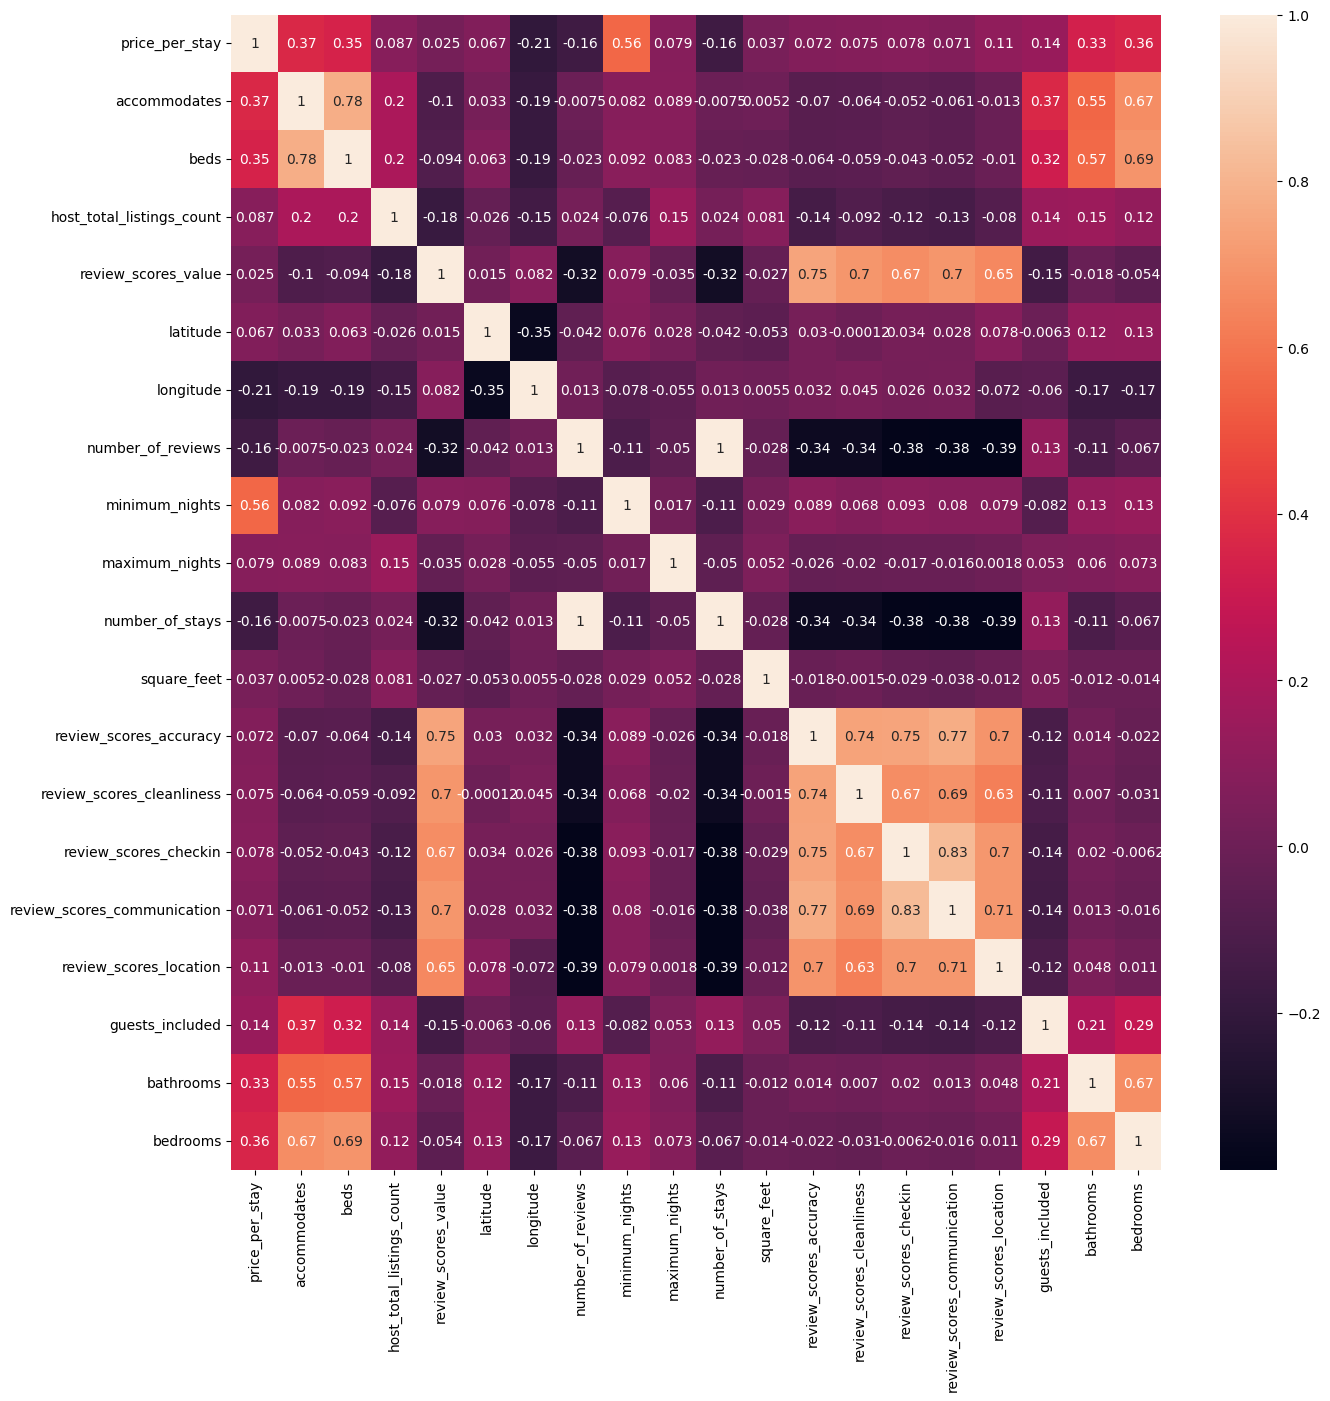

In [426]:
corr = RelevantInfo.corr(method='kendall')
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot = True)

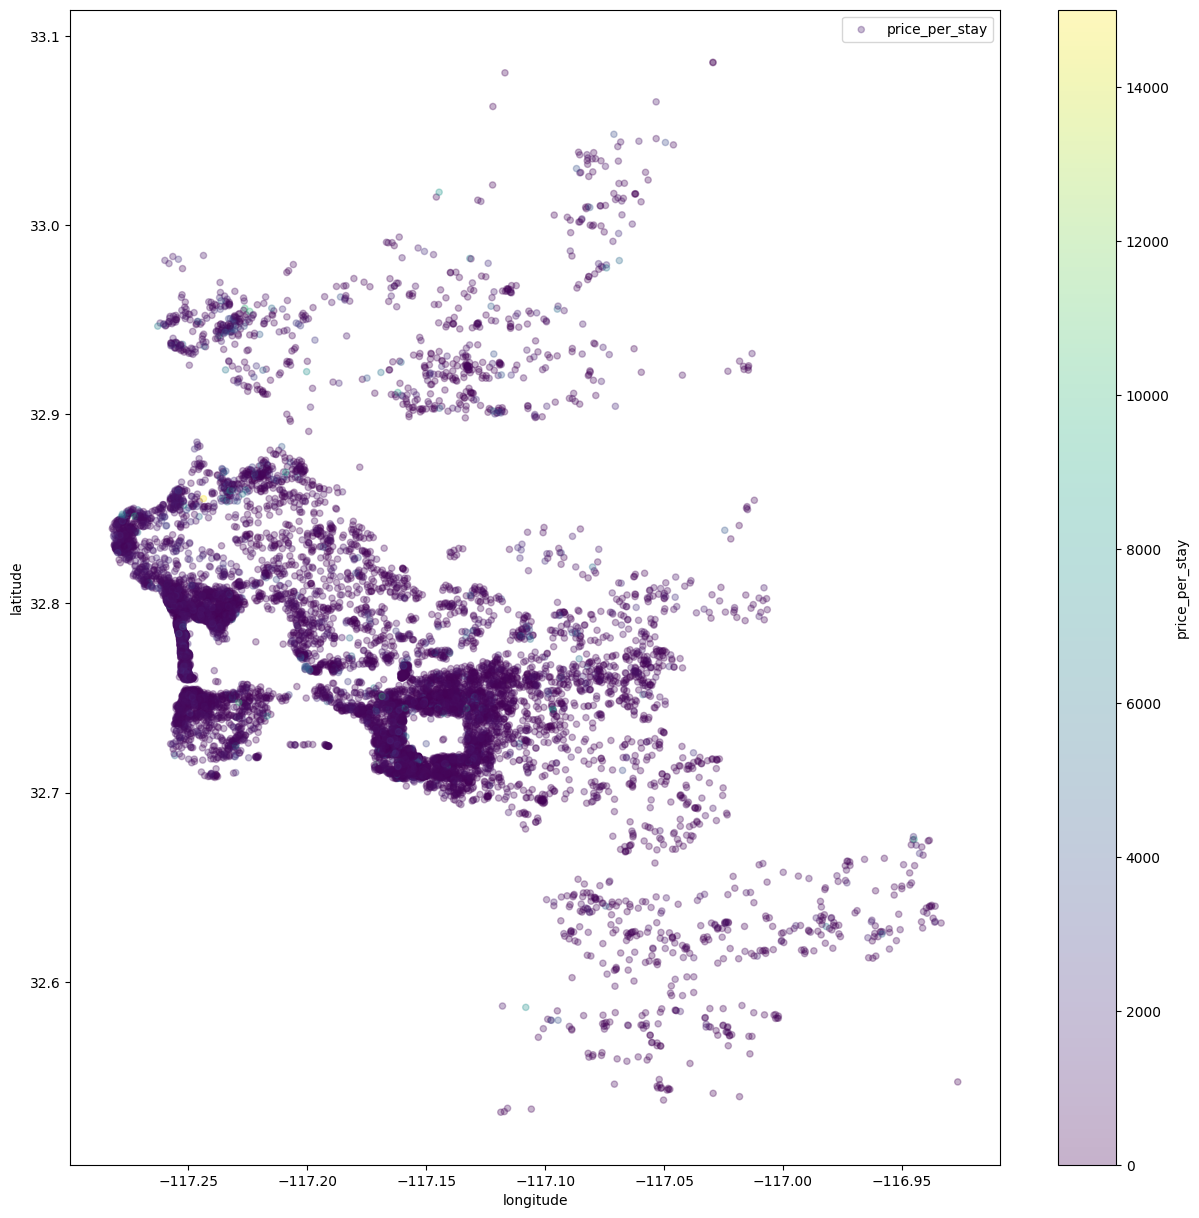

In [427]:
map=RelevantInfo.plot(kind='scatter', x='longitude', y='latitude', label='price_per_stay', c='price_per_stay',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.3, figsize=(15,15))
map.legend()

In [428]:
print(RelevantInfo.neighbourhood_cleansed.unique())
print(len(RelevantInfo.neighbourhood_cleansed.unique()))

['Scripps Ranch' 'La Jolla' 'Pacific Beach' 'College Area' 'Mira Mesa'
 'University City' 'Mission Valley' 'Cortez Hill' 'North City'
 'Rancho Penasquitos' 'Memorial' 'Mission Bay' 'North Hills'
 'Allied Gardens' 'West University Heights' 'Serra Mesa' 'Midtown'
 'Ocean Beach' 'Bay Ho' 'Balboa Park' 'Carmel Valley' 'Little Italy'
 'Rolling Hills Ranch' 'Jomacha-Lomita' 'La Jolla Village' 'Torrey Pines'
 'Mount Hope' 'Sabre Springs' 'Tierrasanta' 'Old Town' 'Bay Park'
 'Rancho Bernadino' 'Normal Heights' 'Kensington' 'East Village'
 'Otay Ranch' 'Linda Vista' 'Moreno Mission' 'Loma Portal' 'Talmadge'
 'North Clairemont' 'Clairemont Mesa' 'Terra Nova' 'Grantville'
 'Bonita Long Canyon' 'City Heights West' 'Alta Vista' 'San Carlos'
 'South Park' 'Paradise Hills' 'Roseville' 'Del Cerro' 'Northwest'
 'City Heights East' 'El Cerritos' 'Marina' 'Core' 'Mountain View'
 'Rolando' 'Bird Land' 'Bay Terrace' 'Lake Murray' 'Gaslamp Quarter'
 'Darnall' 'Webster' 'Nestor' 'Sky Line' 'Chollas View' 'Pa

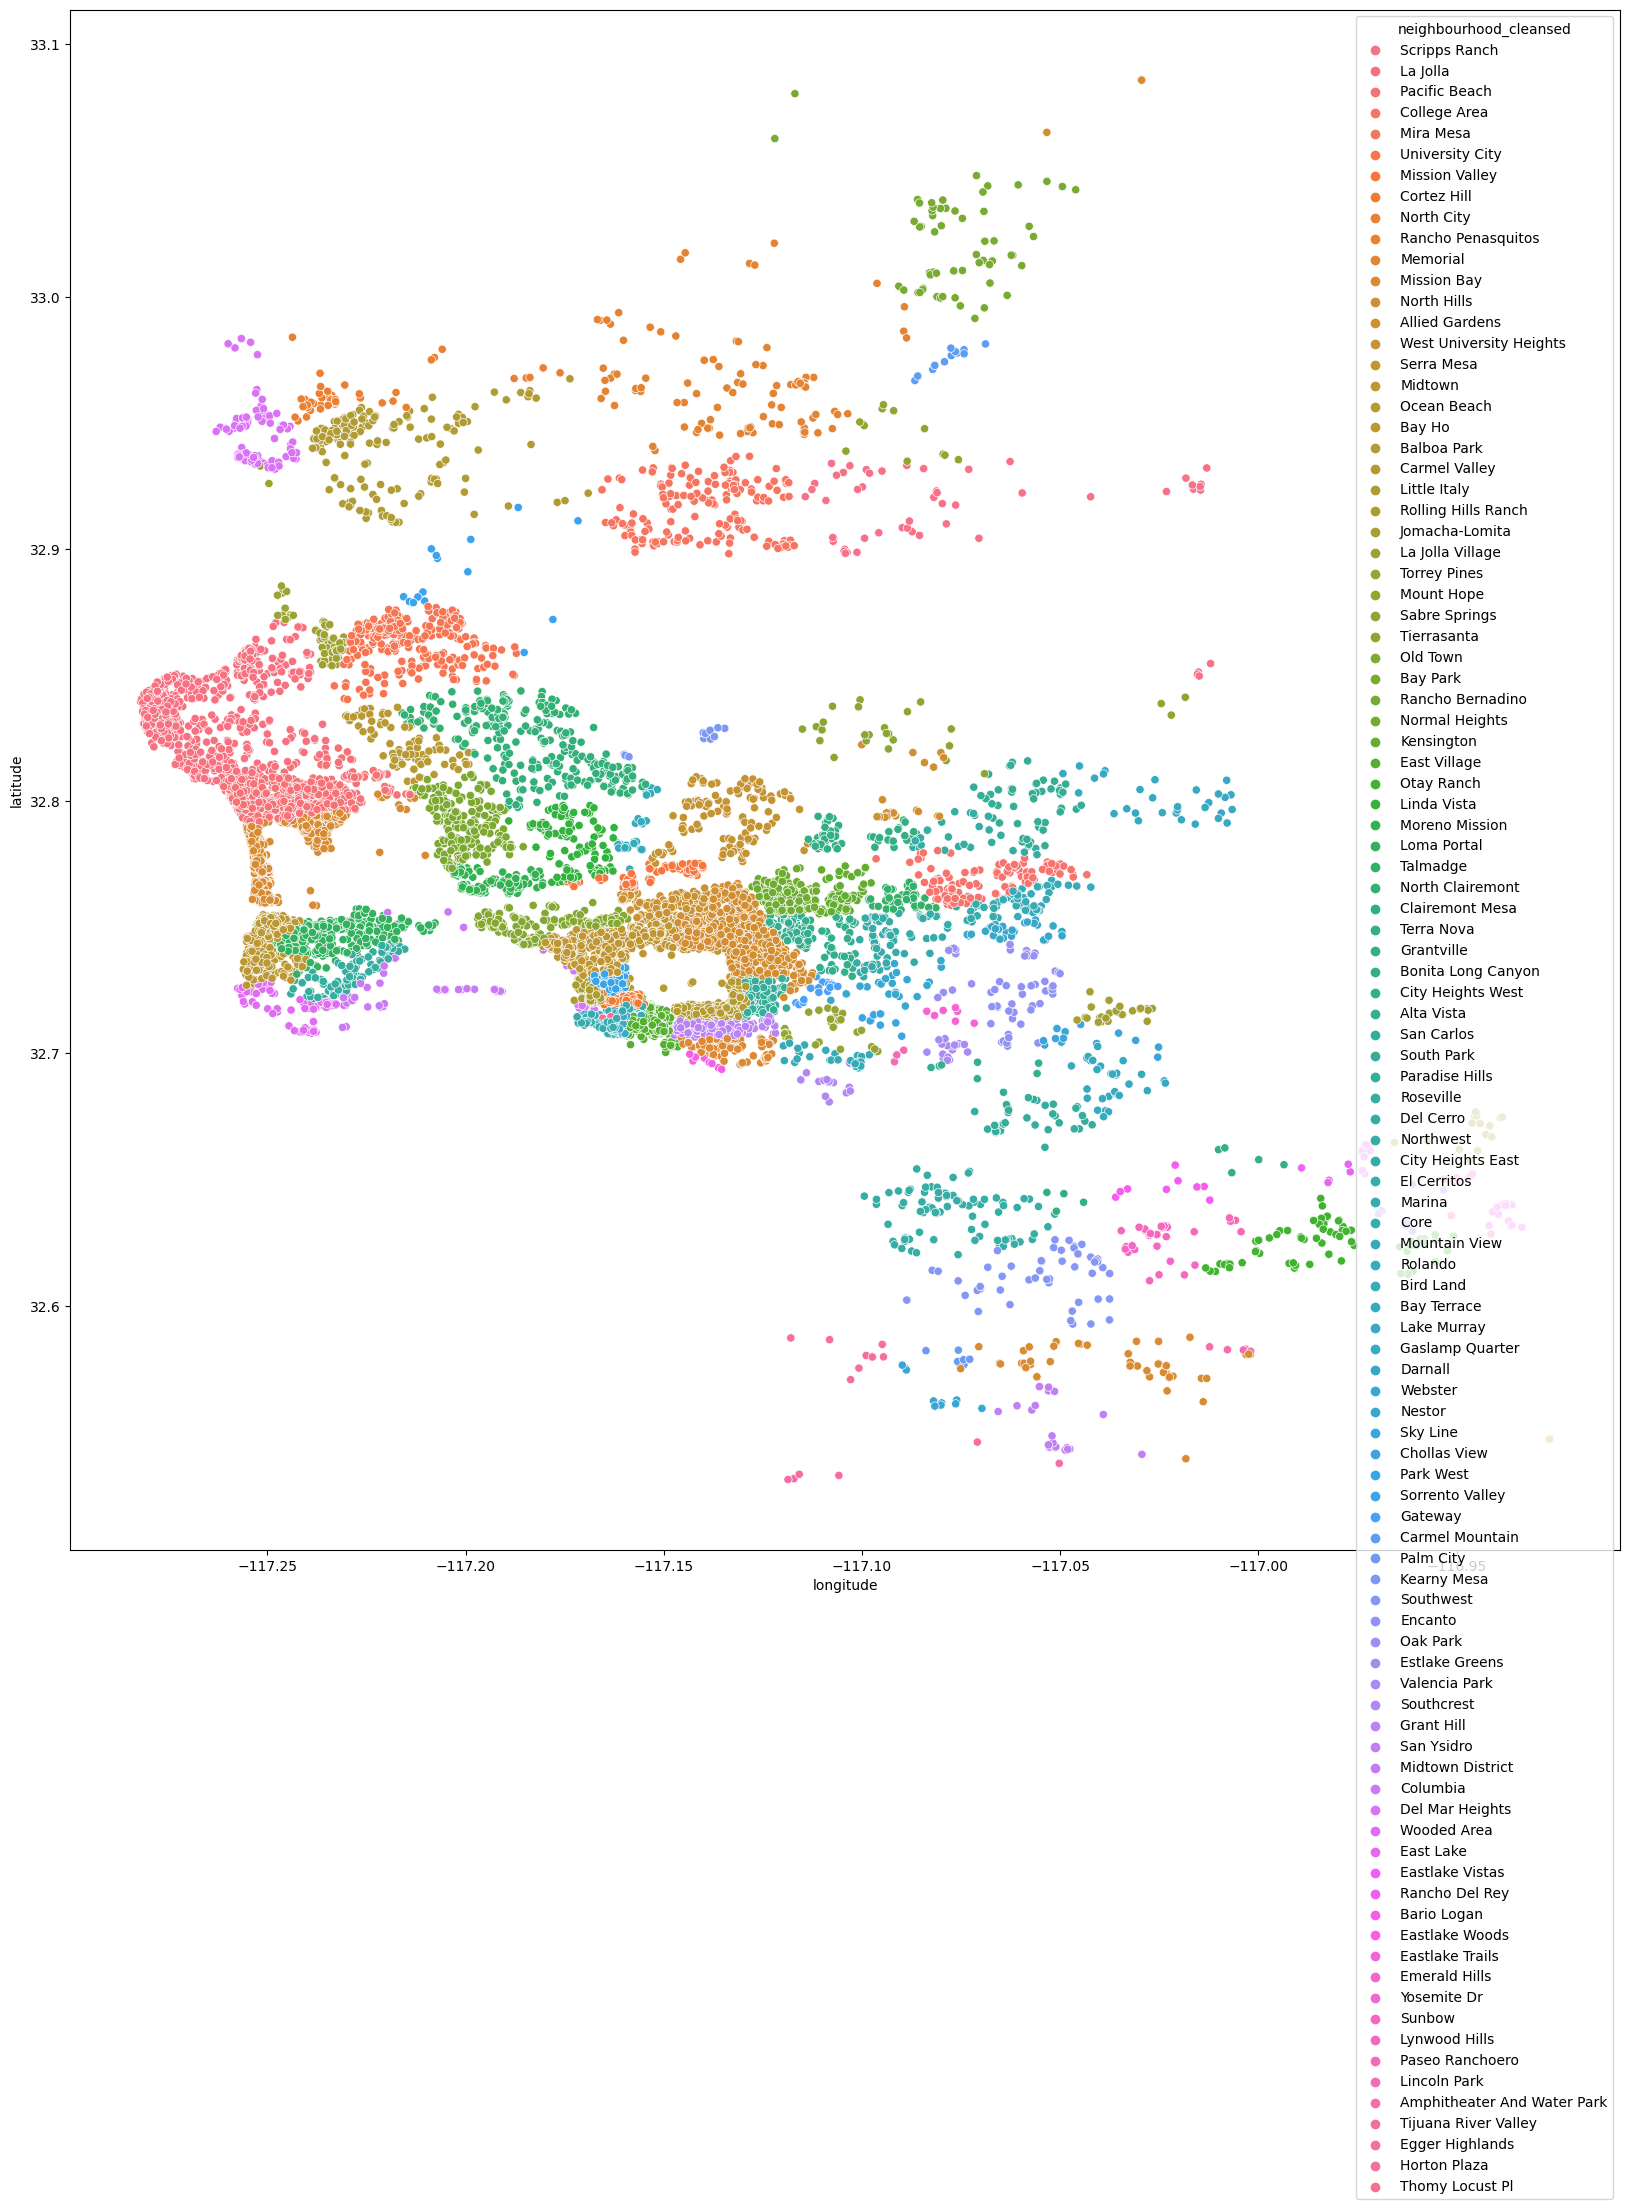

In [429]:
plt.figure(figsize = (20,20))
sns.scatterplot(x=RelevantInfo.longitude,y=RelevantInfo.latitude,hue= RelevantInfo.neighbourhood_cleansed)
plt.show()

In [430]:
print(RelevantInfo.room_type.unique())

['Private room' 'Entire home/apt' 'Shared room']


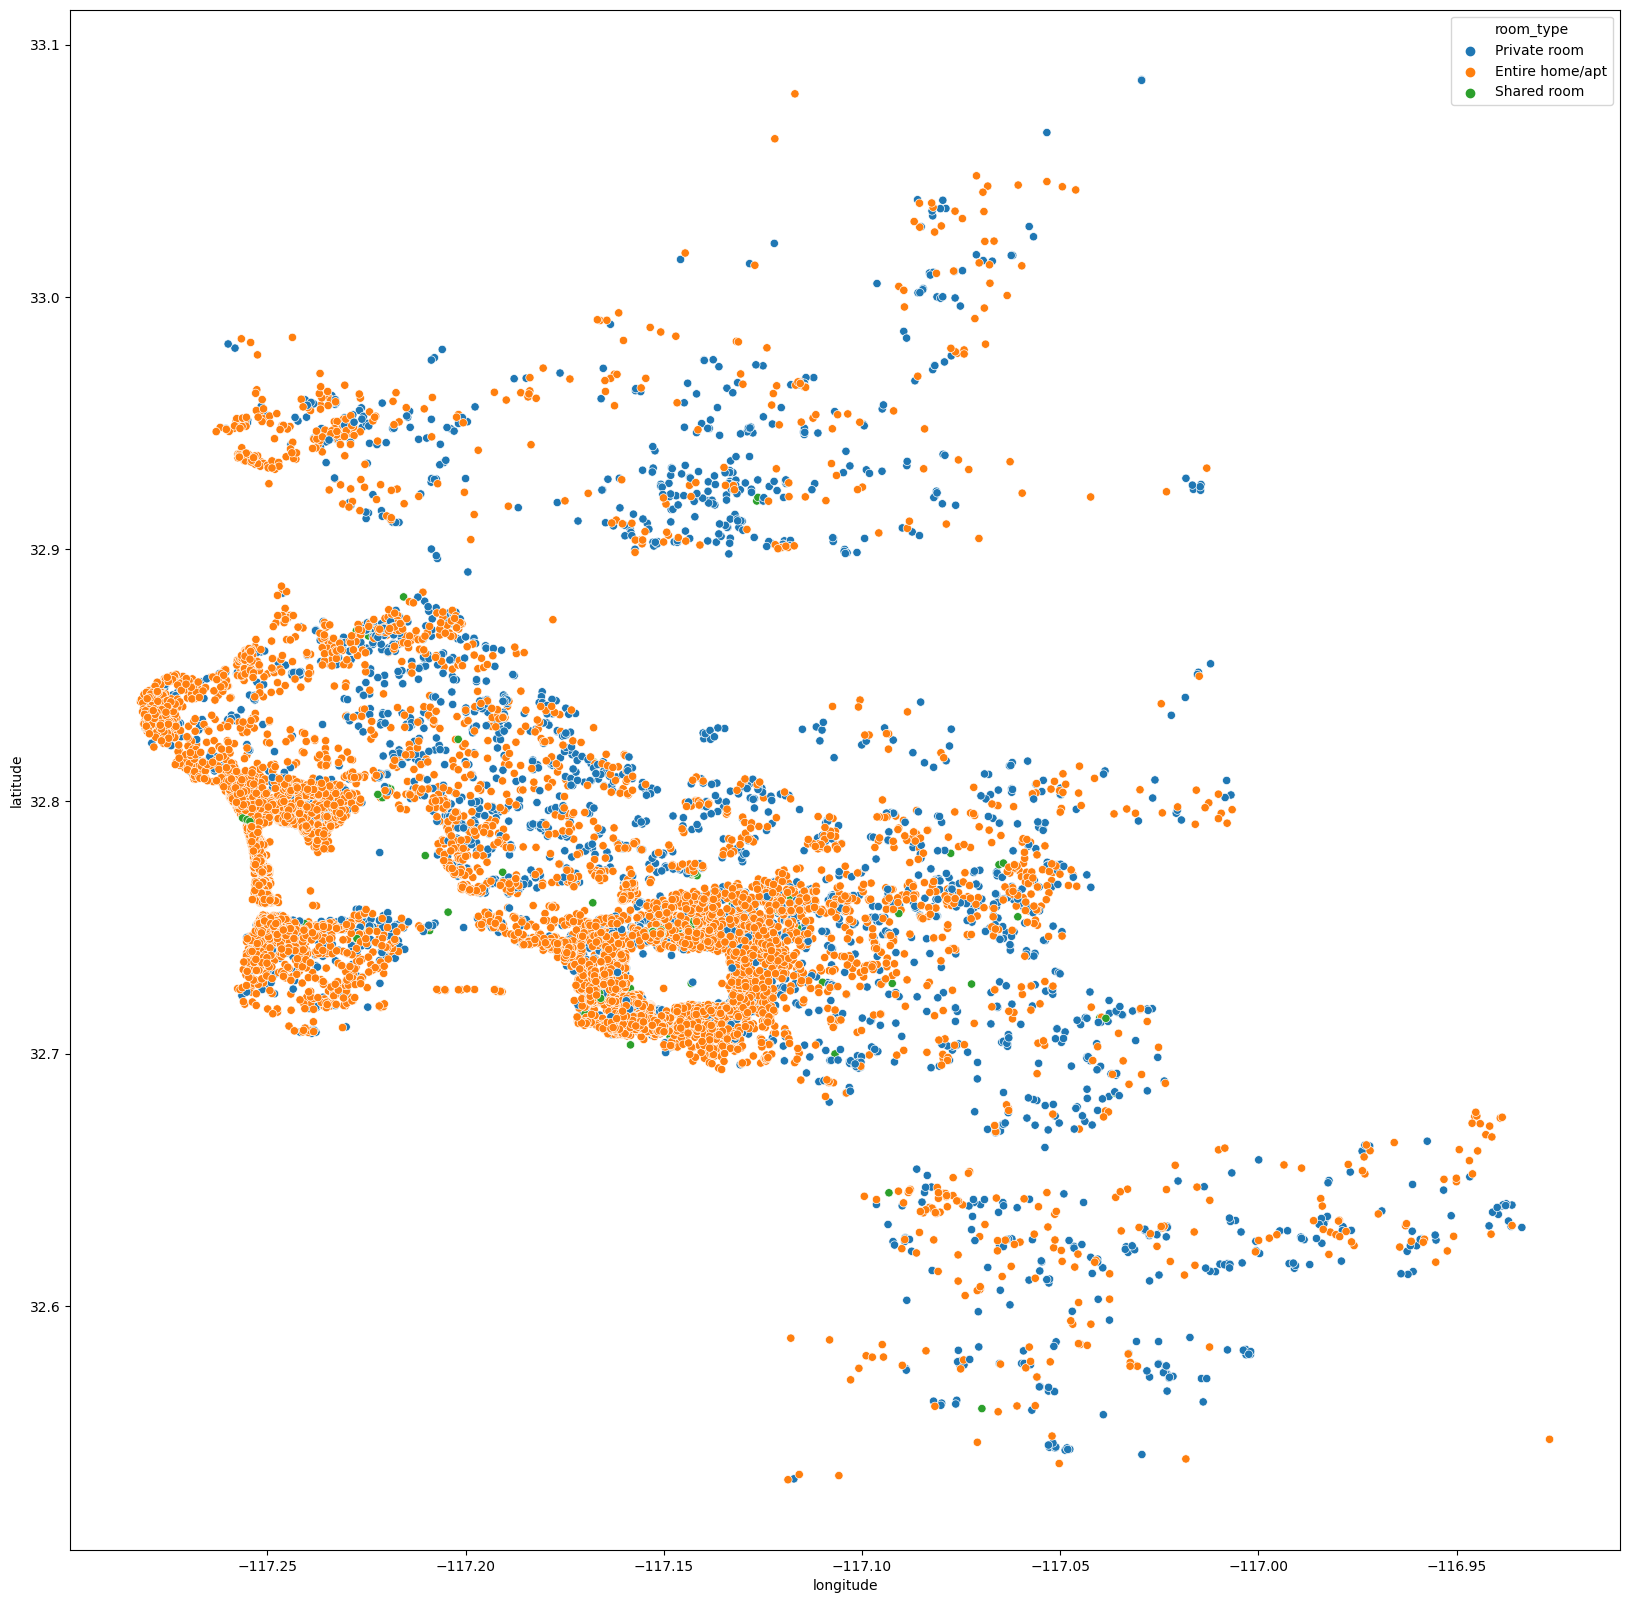

In [431]:
plt.figure(figsize = (20,20))
sns.scatterplot(x=RelevantInfo.longitude,y=RelevantInfo.latitude,hue= RelevantInfo.room_type)
plt.show()

array([[<AxesSubplot: title={'center': 'price_per_stay'}>,
        <AxesSubplot: title={'center': 'accommodates'}>,
        <AxesSubplot: title={'center': 'beds'}>,
        <AxesSubplot: title={'center': 'host_total_listings_count'}>,
        <AxesSubplot: title={'center': 'review_scores_value'}>],
       [<AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'number_of_reviews'}>,
        <AxesSubplot: title={'center': 'minimum_nights'}>,
        <AxesSubplot: title={'center': 'maximum_nights'}>],
       [<AxesSubplot: title={'center': 'number_of_stays'}>,
        <AxesSubplot: title={'center': 'square_feet'}>,
        <AxesSubplot: title={'center': 'review_scores_accuracy'}>,
        <AxesSubplot: title={'center': 'review_scores_cleanliness'}>,
        <AxesSubplot: title={'center': 'review_scores_checkin'}>],
       [<AxesSubplot: title={'center': 'review_scores_communication'}>,
        <AxesSubplot

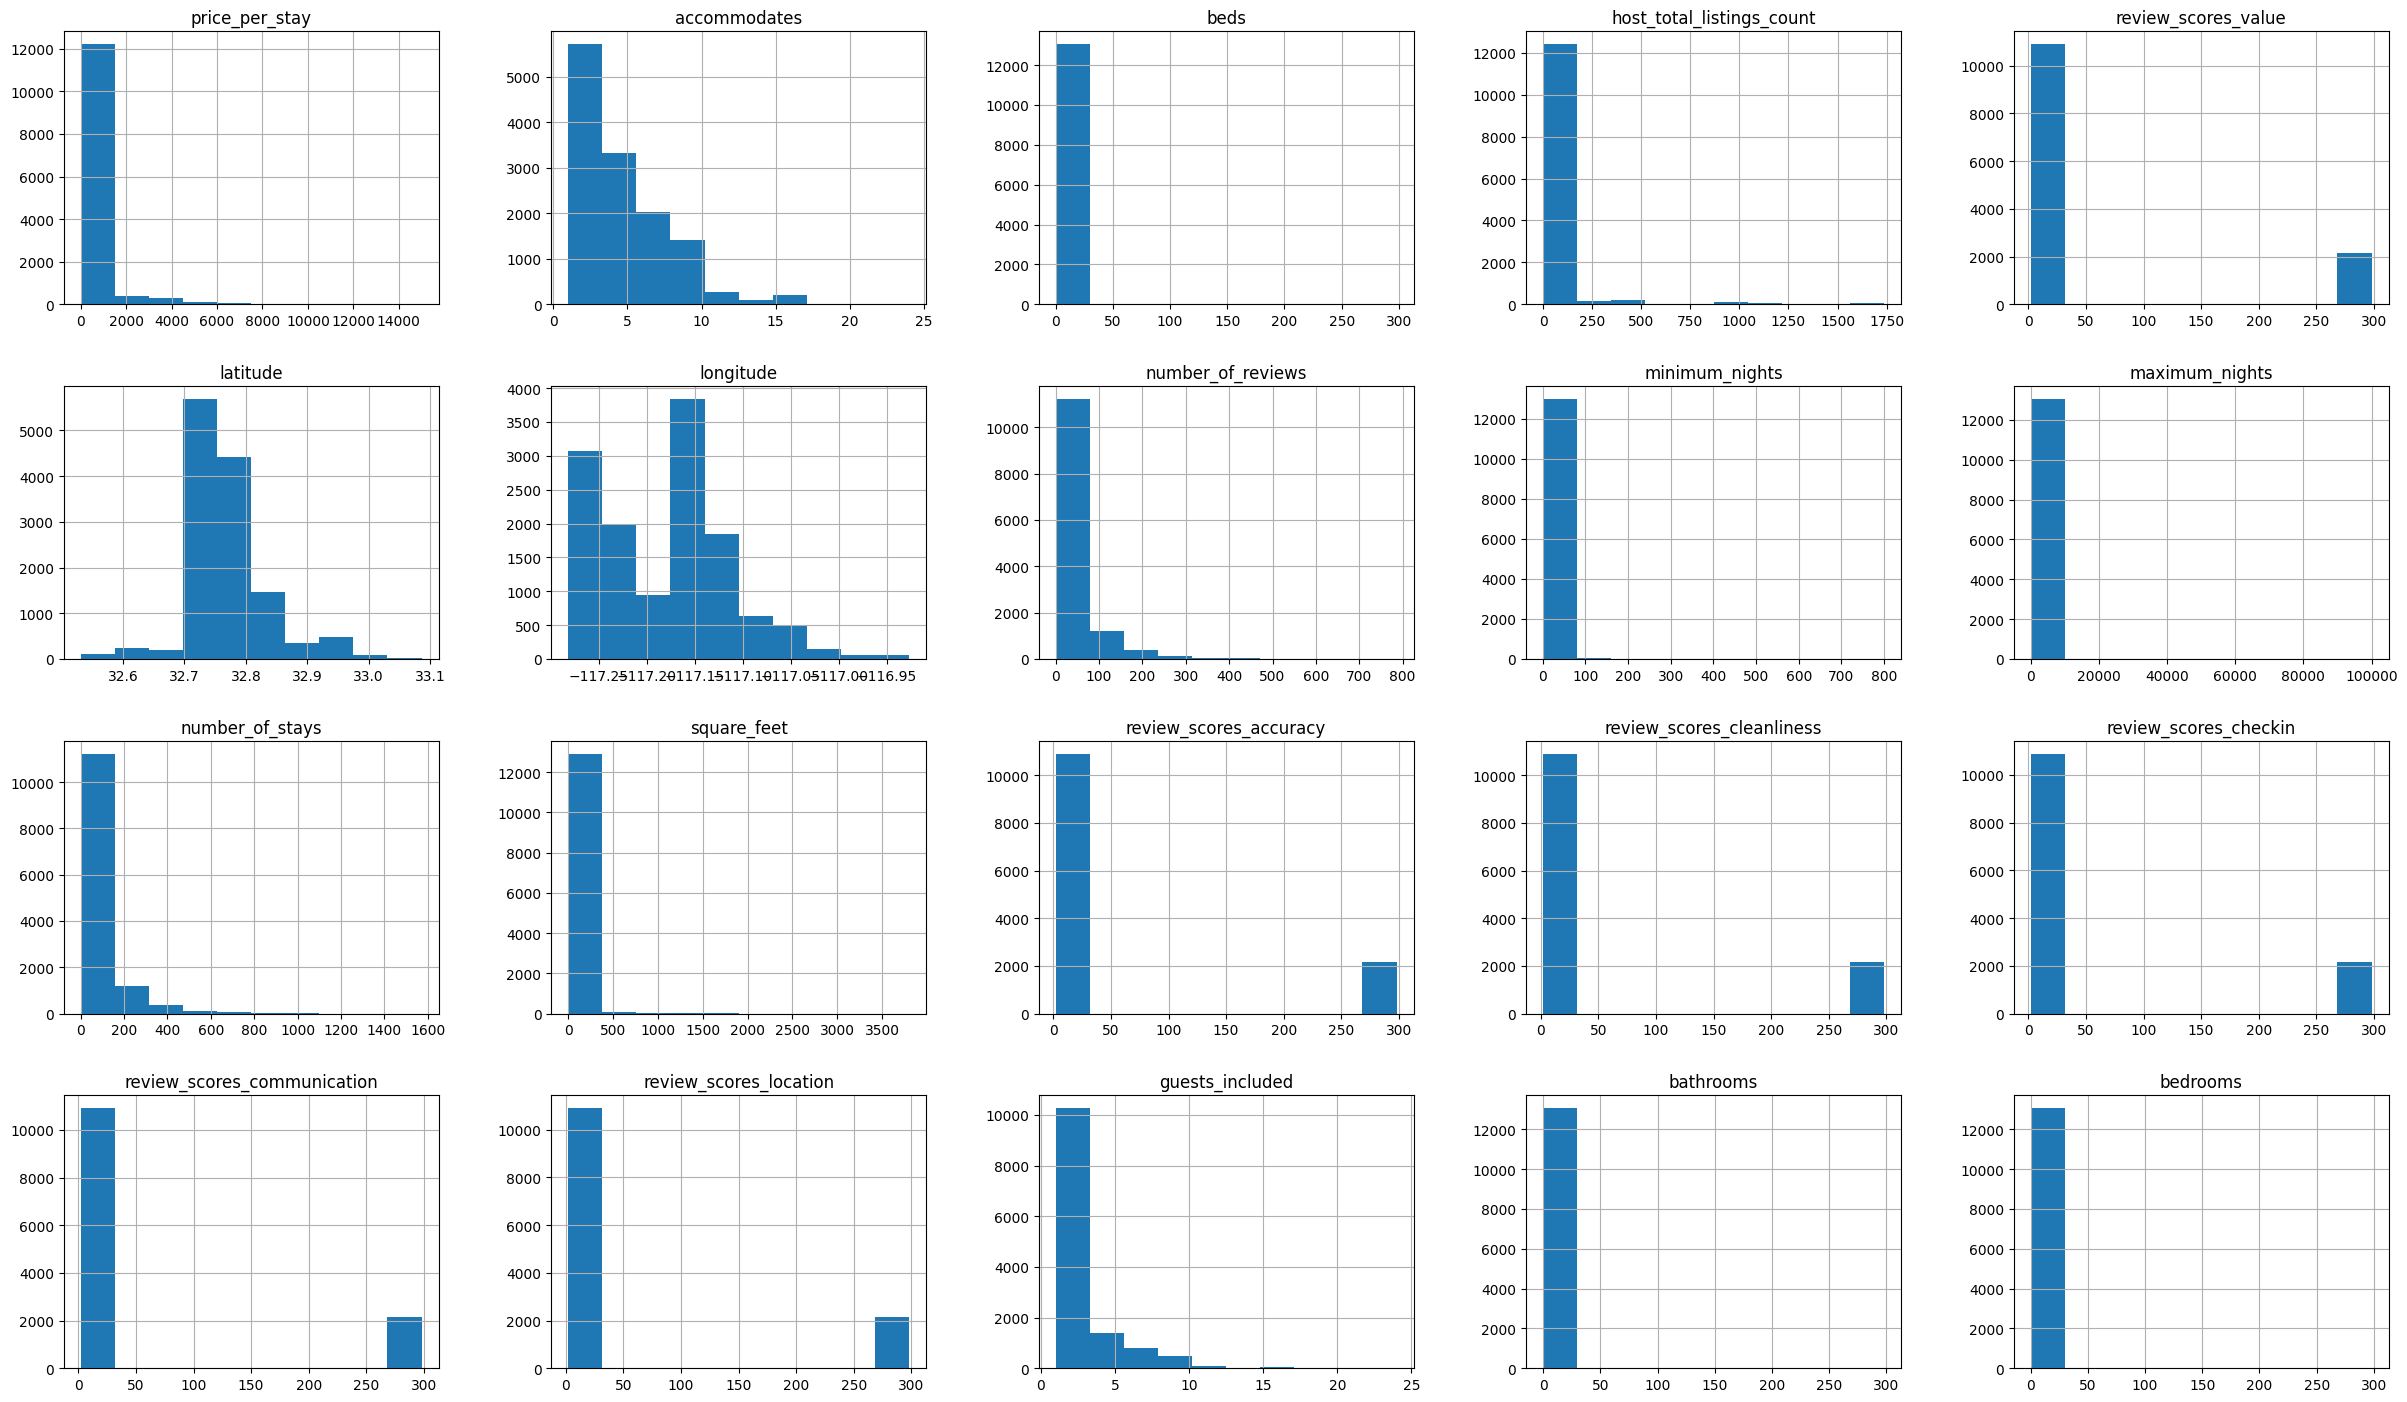

In [432]:
RelevantInfo.hist(figsize=(30,45),layout=(10,5))

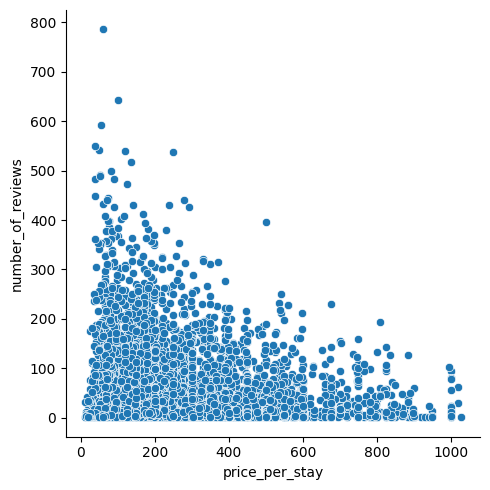

In [433]:
sns.relplot(x="price_per_stay", y="number_of_reviews", data=UpdatedRelevantInfo)

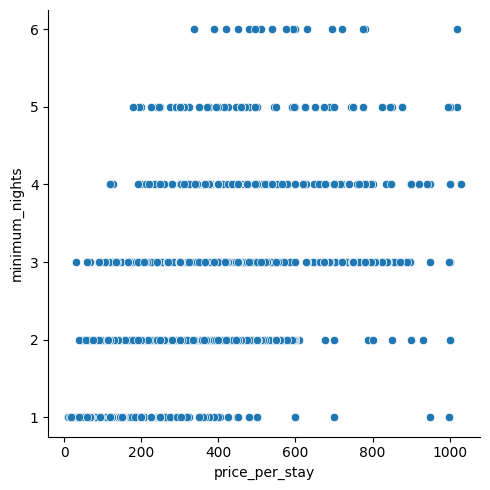

In [434]:
sns.relplot(x="price_per_stay", y="minimum_nights", data=UpdatedRelevantInfo)

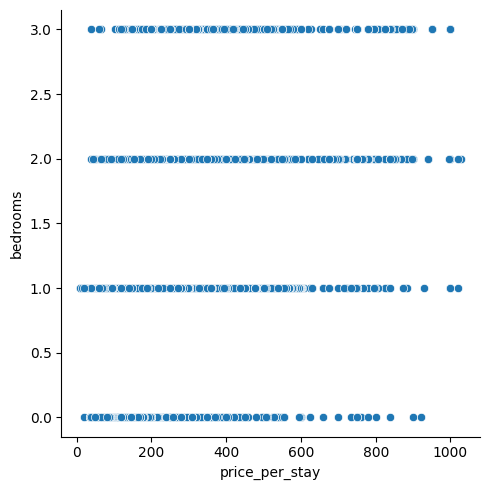

In [435]:
sns.relplot(x="price_per_stay", y="bedrooms", data=UpdatedRelevantInfo)

## There are few outlier values which are present and have to be removed.

### Modelling ###

In [436]:


SD_airbnb = pd.get_dummies(RelevantInfo, columns=['host_has_profile_pic','host_identity_verified','is_business_travel_ready','require_guest_phone_verification','require_guest_profile_picture','requires_license','cancellation_policy','neighbourhood_cleansed', 'instant_bookable','room_type',"host_is_superhost", "host_response_time"],drop_first=True)

#A = ['latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','calculated_host_listings_count']

X = SD_airbnb.drop(['price_per_stay','host_since'], axis=1)
Y = SD_airbnb['price_per_stay']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#### Linear Regression #################
m1 = LinearRegression()
m1.fit(X_train, Y_train)

### Training Accuracy #########
print("Training Results")
print(explained_variance_score(Y_train, m1.predict(X_train)))
Y_pred_train = m1.predict(X_train)
mse = mean_squared_error(Y_train, Y_pred_train)
rmse = np.sqrt(mse)

print(mse)
print(rmse)
#print(m1.score(X_test,Y_test))



print("Test Results")

print(explained_variance_score(Y_test, m1.predict(X_test)))
print(m1.score(X_test,Y_test))

Y_pred = m1.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)

print(mse)
print(rmse)

Training Results
0.22170096260764494
677411.4437360927
823.0500858004284
Test Results
0.2021268833629809
0.20176056824874466
742259.4276925483
861.5447914604024


In [437]:
############## Linear Regression With Intercept ##################

X_train2 = sm.add_constant(X_train)
m2 = sm.OLS(Y_train, X_train2)
results = m2.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:         price_per_stay   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     21.42
Date:                Thu, 23 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:29:56   Log-Likelihood:                -84898.
No. Observations:               10440   AIC:                         1.701e+05
Df Residuals:                   10302   BIC:                         1.711e+05
Df Model:                         137                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [438]:
# Filter out the variables that have p-values < 0.05

sig_vars = results.pvalues[1:].index[results.pvalues[1:] < 0.05]
X_sig = X_train[sig_vars]
print(sig_vars)

Index(['accommodates', 'host_total_listings_count', 'number_of_reviews',
       'minimum_nights', 'number_of_stays', 'square_feet', 'guests_included',
       'host_identity_verified_t', 'cancellation_policy_luxury_moderate',
       'cancellation_policy_super_strict_30',
       'neighbourhood_cleansed_Balboa Park', 'neighbourhood_cleansed_Bay Ho',
       'neighbourhood_cleansed_Bay Park',
       'neighbourhood_cleansed_City Heights West',
       'neighbourhood_cleansed_Clairemont Mesa',
       'neighbourhood_cleansed_College Area',
       'neighbourhood_cleansed_El Cerritos',
       'neighbourhood_cleansed_Grant Hill',
       'neighbourhood_cleansed_Kensington',
       'neighbourhood_cleansed_Lake Murray', 'neighbourhood_cleansed_Memorial',
       'neighbourhood_cleansed_Midtown', 'neighbourhood_cleansed_Mission Bay',
       'neighbourhood_cleansed_Mount Hope',
       'neighbourhood_cleansed_Normal Heights',
       'neighbourhood_cleansed_North Clairemont',
       'neighbourhood_cleanse

In [439]:
############## Lasso Model Selection via CV #################

from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
modelCVLasso = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
modelCVLasso.fit(scale(X_train), scale(Y_train))
modelCVLasso.alpha_



0.015330267519276117

''

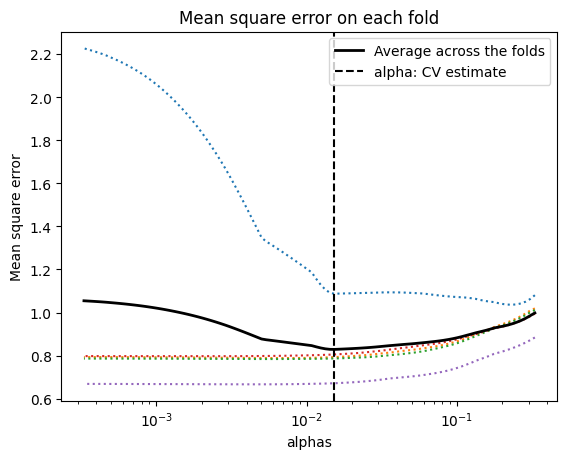

In [440]:


plt.semilogx(modelCVLasso.alphas_, modelCVLasso.mse_path_, ":")
plt.plot(
    modelCVLasso.alphas_ ,
    modelCVLasso.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    modelCVLasso.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")

;

In [441]:
### Lasso Model Implementation  based on above mentioned CV ##########

## Alpha ~ 0.01 as seen above

m3 = Lasso(alpha= 0.01)
m3.fit(scale(X_train), scale(Y_train))


#### Training Results #################

y_pred3 = m3.predict(X_train)

mse3 = mean_squared_error(Y_train, y_pred3)
rmse3 = np.sqrt(mse3)
print(mse3)
print(rmse3)
print(m3.score(scale(X_train),scale(Y_train)))


### TEst Results
y_pred3 = m3.predict(X_test)

mse3 = mean_squared_error(Y_test, y_pred3)
rmse3 = np.sqrt(mse3)
print(mse3)
print(rmse3)
print(m3.score(scale(X_test),scale(Y_test)))




1134594.6860253525
1065.1735473740193
0.2143946907793226
1213664.726087992
1101.6645252017477
0.21182897340597917


C:\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


In [442]:

A = X_train.iloc[:,m3.coef_ != 0].columns.tolist()
print(len(A))

## 58 parameters have non zero values. Lasso shrunk half of the predictors

import eli5
eli5.show_weights(m3, top=-1, feature_names = X_train.columns.tolist())


58


Weight?,Feature
+0.273,minimum_nights
+0.057,neighbourhood_cleansed_East Village
+0.054,review_scores_checkin
+0.054,neighbourhood_cleansed_Gaslamp Quarter
+0.052,neighbourhood_cleansed_Carmel Valley
+0.044,host_identity_verified_t
+0.043,neighbourhood_cleansed_Little Italy
+0.040,neighbourhood_cleansed_La Jolla Village
+0.039,latitude
+0.038,review_scores_cleanliness


637.6362362220276
406579.96974339336
0.5627564273338672
Feature Ranking
1. feature minimum_nights (0.668883)
2. feature room_type_Private room (0.035448)
3. feature latitude (0.030132)
4. feature accommodates (0.028314)
5. feature bedrooms (0.026426)
6. feature host_total_listings_count (0.026077)
7. feature longitude (0.021818)
8. feature bathrooms (0.018573)
9. feature beds (0.016356)
10. feature number_of_reviews (0.016167)
11. feature maximum_nights (0.013331)
12. feature neighbourhood_cleansed_Normal Heights (0.011549)
13. feature guests_included (0.011474)
14. feature number_of_stays (0.010527)
15. feature neighbourhood_cleansed_Moreno Mission (0.006205)
16. feature cancellation_policy_super_strict_60 (0.003563)
17. feature review_scores_communication (0.003144)
18. feature neighbourhood_cleansed_Del Mar Heights (0.002919)
19. feature host_response_time_within a few hours (0.002873)
20. feature neighbourhood_cleansed_Old Town (0.002617)
21. feature neighbourhood_cleansed_Pacific 

<BarContainer object of 15 artists>

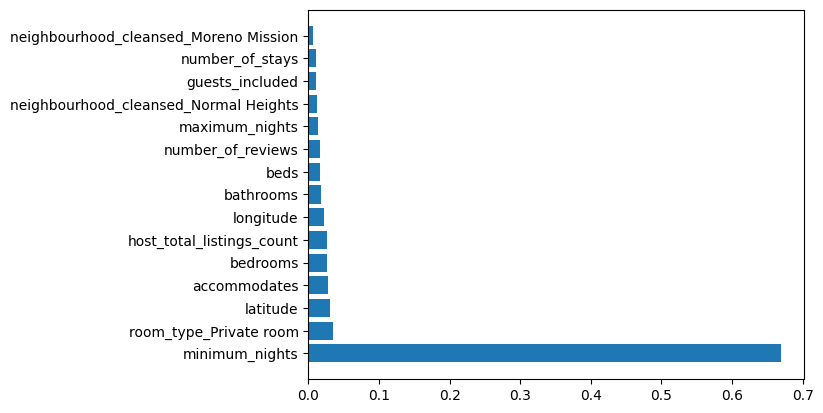

In [443]:
########## Decision Trees ######################

m5 = DecisionTreeRegressor(random_state=42)
m5.fit(X_train, Y_train)



#### Test Results
y_pred5 = m5.predict(X_test)
mse5 = mean_squared_error(Y_test, y_pred5)
print(np.sqrt(mse5))
print(mse5)
print(r2_score(Y_test, y_pred5))


Tree_FeatureImp = m5.feature_importances_
indices = np.argsort(m5.feature_importances_)[::-1]
print("Feature Ranking")

Importance = []
Feature_Name = []

for f in range(X_train.shape[1]):
    print("%d. feature %s (%f)" % (f+1,X_train.columns[indices[f]],Tree_FeatureImp[indices[f]]))
    
    if f < 15:
        Feature_Name.append(X_train.columns[indices[f]])
        Importance.append(Tree_FeatureImp[indices[f]])
    

    ### Top 15 features
plt.barh(Feature_Name, Importance)




0.7100795716702339
519.2191254207058
Feature Ranking
1. feature minimum_nights (0.673379)
2. feature accommodates (0.038307)
3. feature bedrooms (0.030790)
4. feature longitude (0.028324)
5. feature room_type_Private room (0.024467)
6. feature bathrooms (0.023698)
7. feature latitude (0.021983)
8. feature host_total_listings_count (0.017201)
9. feature beds (0.016343)
10. feature maximum_nights (0.015119)
11. feature guests_included (0.012277)
12. feature number_of_reviews (0.009578)
13. feature number_of_stays (0.008517)
14. feature neighbourhood_cleansed_Moreno Mission (0.007155)
15. feature neighbourhood_cleansed_Old Town (0.004272)
16. feature review_scores_cleanliness (0.003698)
17. feature cancellation_policy_strict_14_with_grace_period (0.003379)
18. feature review_scores_value (0.003223)
19. feature neighbourhood_cleansed_Normal Heights (0.003025)
20. feature instant_bookable_t (0.002587)
21. feature host_identity_verified_t (0.002566)
22. feature host_response_time_within an h

<BarContainer object of 15 artists>

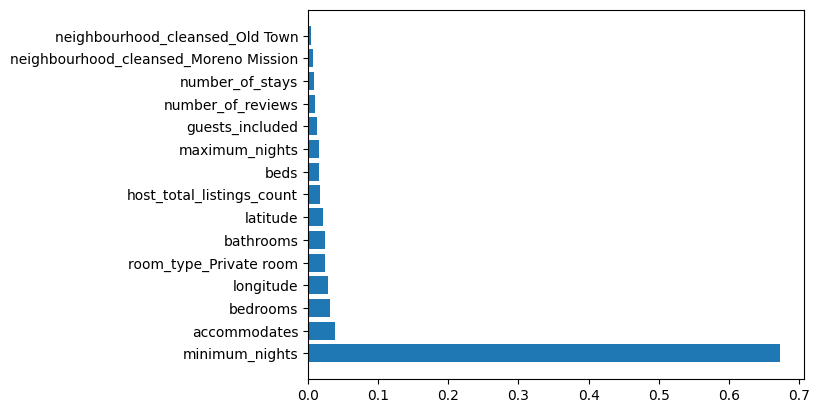

In [444]:
######### Random Forest ###################

m6 = RandomForestRegressor(n_estimators=100, random_state=42)
m6.fit(X_train, Y_train)


### Test Results ############
y_pred6 = m6.predict(X_test)
mse6 = mean_squared_error(Y_test, y_pred6)

print(r2_score(Y_test, y_pred6))
print(np.sqrt(mse6))


##### Feature Importance ##############

#print(m6.feature_importances_)
RF_FeatureImp = m6.feature_importances_
indices = np.argsort(m6.feature_importances_)[::-1]
print("Feature Ranking")


Importance = []
Feature_Name = []

for f in range(X_train.shape[1]):
    print("%d. feature %s (%f)" % (f+1,X_train.columns[indices[f]],RF_FeatureImp[indices[f]]))
    
    if f < 15:
        Feature_Name.append(X_train.columns[indices[f]])
        Importance.append(RF_FeatureImp[indices[f]])
    
    
plt.barh(Feature_Name, Importance)

In [445]:
print(Y_test)

m7 = XGBRegressor()

m7.fit(X_train, Y_train, verbose=False)


y_pred7 = m7.predict(X_test)
mse7 = mean_squared_error(Y_test, y_pred7)
print(r2_score(Y_test, y_pred7))
print(np.sqrt(mse7))

11313    389.0
1984     225.0
2323     180.0
11634    506.0
9774     585.0
         ...  
1110     700.0
10715     95.0
1406     378.0
7591     178.0
3780      75.0
Name: price_per_stay, Length: 2611, dtype: float64
0.6885403270255226
538.1609534781559


138
[0.04654904 0.06837133 0.08763505 0.10486978 0.11984838 0.13395747
 0.14572194 0.15603141 0.16557189 0.17471692 0.18367049 0.19235792
 0.20084815 0.20910647 0.21733875 0.22530503 0.23316419 0.2409492
 0.24869246 0.25639092 0.26399016 0.27156599 0.27913406 0.28667388
 0.29415862 0.3016227  0.30906605 0.316491   0.32389876 0.33129035
 0.33867258 0.34603855 0.35340031 0.36075184 0.36809997 0.37544019
 0.38277391 0.39010652 0.39743177 0.40475655 0.41208018 0.41939641
 0.42670799 0.43401519 0.4413209  0.44862394 0.45592455 0.46322019
 0.47051145 0.47780087 0.48508901 0.49237572 0.49966016 0.50694366
 0.51422604 0.52150638 0.52878385 0.53605989 0.54333355 0.55060561
 0.55787744 0.56514849 0.57241774 0.5796861  0.58695302 0.59421875
 0.60148351 0.6087474  0.61601072 0.62327372 0.63053605 0.63779684
 0.64505691 0.65231695 0.65957607 0.6668348  0.67409291 0.68135064
 0.68860737 0.69586404 0.70312036 0.71037612 0.7176312  0.72488576
 0.73213982 0.73939378 0.74664739 0.75390079 0.76115326 0.7

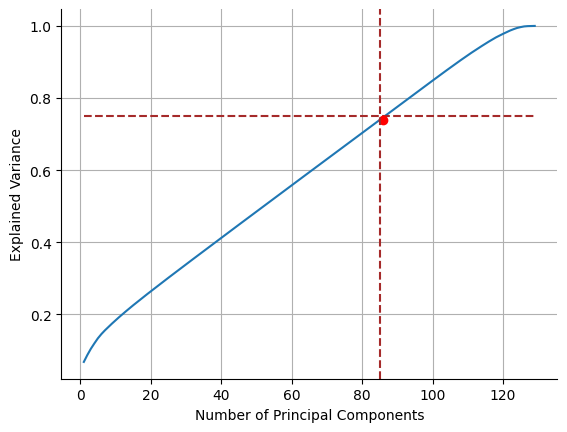

In [446]:
####### Principal Component Analysis ################


pca = PCA()
print(X.shape[1])
X_reduced = pca.fit_transform(scale(X_train))
comp = pca.fit(scale(X_train))

print(np.cumsum(pca.explained_variance_ratio_))

x = np.arange(1, 130)
f = pd.DataFrame(np.cumsum(comp.explained_variance_ratio_))[0].iloc[x]
g = 0*x + 0.75

plt.plot(x, f, '-')
plt.plot(x, g, '--',color = "brown")
plt.grid()
idx = np.argwhere(np.diff(np.sign(f - g))).flatten()
plt.plot(x[idx], f[idx], 'ro')

plt.axvline(x = idx,linestyle='dashed',color = "brown")

plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
sns.despine()
plt.show()
#np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

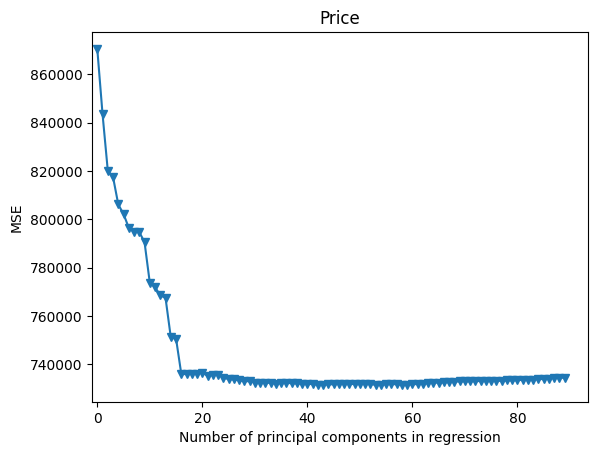

In [447]:
from sklearn import model_selection

n = len(X_reduced)
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []
#Accuracy = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), Y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1,90):
    #print(i)
    score = -1*model_selection.cross_val_score(regr, X_reduced[:,:i], Y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Price')
plt.xlim(xmin=-1);

In [448]:
### Based on the elbow rule we can chose principal components to be 25 ###########

In [449]:
pca = PCA(n_components=25).fit(X_train)
X_train_transform = pca.transform(scale(X_train))
X_train_transform.shape


C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


(10440, 25)

In [450]:
X_test_transform = pca.transform(scale(X_test))
X_test_transform.shape

C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


(2611, 25)

### Running Lasso,, Decision Tree, Random Forest and XGBoost with Transformed X variables after PCA (ncomponents = 25)

In [451]:
PC_m1 = LinearRegression()
PC_m1.fit(X_train_transform, (Y_train))

print(PC_m1.score(X_test_transform,Y_test))
# print(m1.intercept_)
# print(m1.coef_)
print(explained_variance_score(Y_test, PC_m1.predict(X_test_transform))) 

#### Test Results ##########
Y_pred = PC_m1.predict(X_test_transform)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)

print(mse)
print(rmse)

0.19325314781498915
0.19361534150179138
750170.2283509991
866.1236795925852


In [452]:
############ Random Forest with PCA Components ##############

m6 = RandomForestRegressor(n_estimators=100, random_state=42)
m6.fit(X_train_transform, Y_train)

#### Test Results ##########

y_pred6 = m6.predict(X_test_transform)
mse6 = mean_squared_error(Y_test, y_pred6)
print(r2_score(Y_test, y_pred6))
print(np.sqrt(mse6))

0.6104604113059727
601.8483485526989


In [453]:
m5 = DecisionTreeRegressor(random_state=42)
m5.fit(X_train_transform, Y_train)

y_pred5 = m5.predict(X_test_transform)
mse5 = mean_squared_error(Y_test, y_pred5)
print(mse5)
print(np.sqrt(mse5))
print(r2_score(Y_test, y_pred5))

571352.2466487936
755.8784602360313
0.38555729212826173


In [454]:
m7 = XGBRegressor()

m7.fit(X_train_transform, Y_train, verbose=False)


y_pred7 = m7.predict(X_test_transform)
mse7 = mean_squared_error(Y_test, y_pred7)
print(r2_score(Y_test, y_pred7))
print(mse7)
print(np.sqrt(mse7))

0.429627934127532
530372.2496613545
728.2666061693028
